# Author : Khushi Jain


## Task 2 : Prediction using Unsupervised Machine Learning

#### In this K-means clustering task I tried to predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset.

## Problem Statement
From the given IRIS Dataset predict the optimal number of clusters and represent it visually

In [16]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,8]

In [17]:
# uploading the data into file
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
# Deleting the irrelevant columns
df.drop(['Id','Species'],inplace=True, axis=1)

### Exploratory Data Analysis

In [19]:
# Understand the Dataset

# Dimensions of the data

df.shape

(150, 4)

There are 150 observations and 4 columns in the daset

##### Check for the data type

In [20]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

All the variables have the data type as per the data definition. Thus, there is no need for type conversion

### Distribution of Variables
###### Check the distribution of all the variables.

As all the variables are numerical, we plot the boxplot for each variable to check the distribution. Also, we can use these boxplots to identify the outliers in the variables.

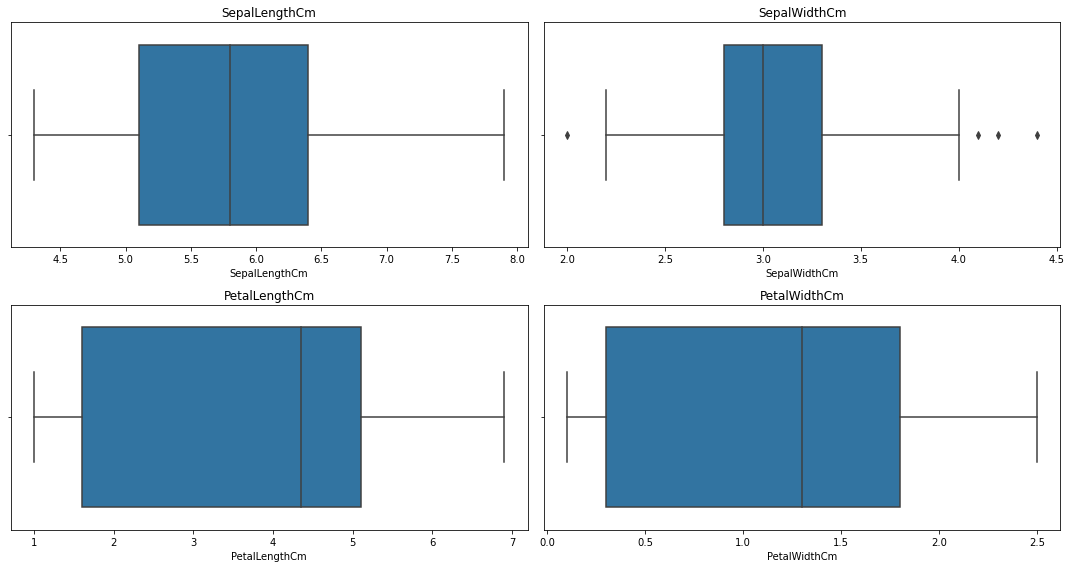

In [21]:
c=1
for i in df:
    plt.subplot(2,2,c)
    sns.boxplot(df[i])
    c+=1
    plt.title(i)
plt.tight_layout()
plt.show()

### The above boxplots show that the all variable is near normally distributed.

In [22]:
# Summary Statistics
# Check the statistical summary of all the variables.
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Checking the missing values

In [23]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

There is no missing values in the dataset

## Scale the data

In [24]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
df_s=ss.fit_transform(df)
df_s=pd.DataFrame(df_s,columns=df.columns)
df_s

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


## K-Means Clustering

In [25]:
# Identify the Optimal Number of Clusters
from sklearn.cluster import KMeans

wcss=[]

for i in range(1,8):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_s)
    wcss.append(kmeans.inertia_)

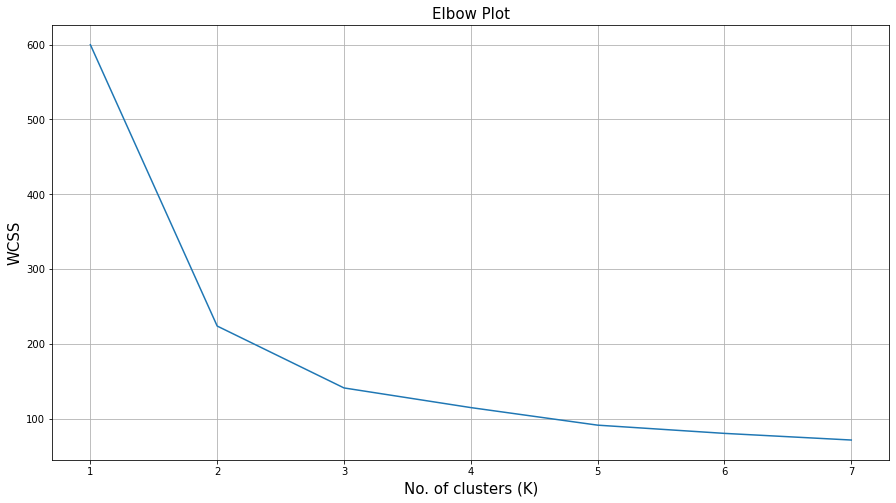

In [26]:
sns.lineplot(range(1,8),wcss)
plt.grid()
plt.title('Elbow Plot',fontsize=15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.show()

From the elbow plot  method, we can consider the optimal number of clusters as 2.

## Build the Model

In [37]:
k_model=KMeans(n_clusters=2,random_state=0)
y_kmeans=k_model.fit(df_s)


In [38]:
df['Kmeans_label']=k_model.labels_
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Kmeans_label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


The new column of cluster label added to the dataframe that indicates the cluster number for each observation.

### Plot a barplot to visualize the cluster sizes.

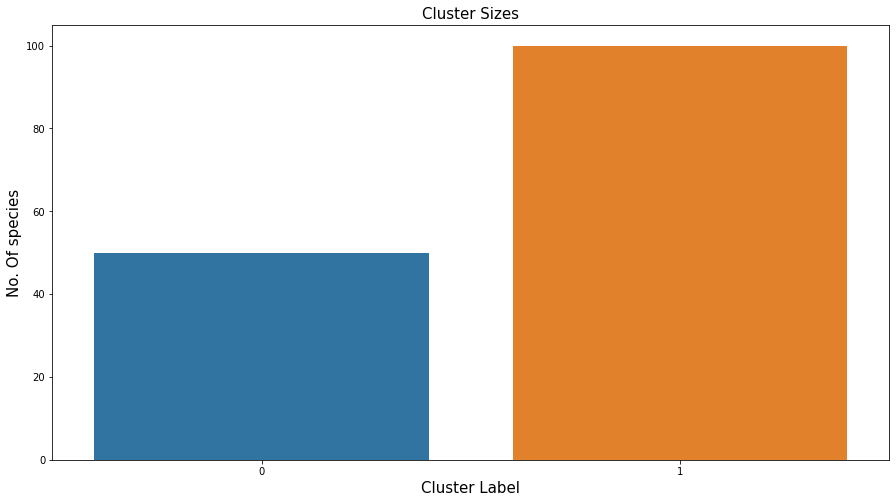

In [39]:
sns.countplot(df['Kmeans_label'])
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Cluster Label', fontsize = 15)
plt.ylabel('No. Of species', fontsize = 15)
plt.show()

## Visualize the Clusters

In [41]:
from sklearn.decomposition import PCA

pca_2=PCA(n_components=2,random_state=0)

comp=pca_2.fit_transform(df_s)

df_pca=pd.DataFrame(data=comp,columns=['PC1','PC2'])

df_pca.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


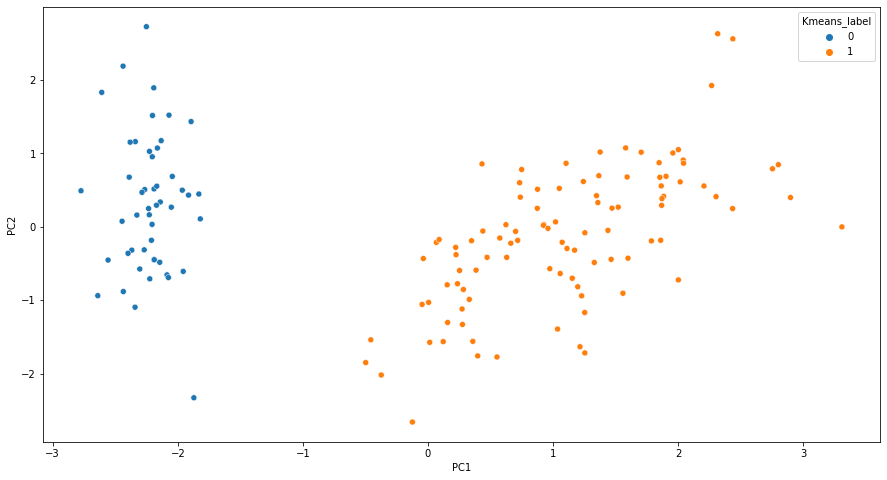

In [43]:
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'],hue=df['Kmeans_label'])
plt.show()

In [44]:
print(kmeans.cluster_centers_)

[[-1.38535265e+00 -3.49675592e-02 -1.33811320e+00 -1.33488889e+00]
 [ 2.45501388e-01 -5.37730458e-01  5.35295827e-01  4.85004971e-01]
 [ 1.97705575e+00  1.64296105e-01  1.44514709e+00  1.11927322e+00]
 [-3.64080601e-01 -1.41420269e+00  1.07449102e-01  1.75297293e-03]
 [ 8.52214022e-01  1.83579686e-01  8.61325863e-01  1.04477187e+00]
 [-3.81390297e-01  2.28824475e+00 -1.30065404e+00 -1.20028561e+00]
 [-9.24914744e-01  1.06908170e+00 -1.28213207e+00 -1.21305727e+00]]


## This concludes the K-Means.

# E N D